<a href="https://colab.research.google.com/github/roshan-pasha/Machine-Learning/blob/master/PyCaret_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np, pandas as pd,seaborn as sns, matplotlib.pyplot as plt,io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# !pip3 install pycaret

In [1]:
from pycaret.utils import version
version()

1.0.0


In [2]:
from google.colab import files
upload_train = files.upload()

Saving Train.csv to Train.csv


In [3]:
from google.colab import files
upload_test = files.upload()

Saving Test.csv to Test.csv


In [4]:
from google.colab import files
upload_sample = files.upload()

Saving Sample_Submission.xlsx to Sample_Submission.xlsx


In [0]:
train = pd.read_csv(io.BytesIO(upload_train['Train.csv']))
test  = pd.read_csv(io.BytesIO(upload_test['Test.csv']))
sample_submission = pd.read_excel(io.BytesIO(upload_sample['Sample_Submission.xlsx']))

In [0]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [0]:
for i in train.columns:
  out = train[i].nunique()
  print(i,':',out)

grade_A_Component_1 : 2
grade_A_Component_2 : 2
max_luminosity : 131
thickness : 143
xmin : 775
xmax : 811
ymin : 1358
ymax : 1358
pixel_area : 813
log_area : 1358
x_component_1 : 2
x_component_2 : 2
x_component_3 : 2
x_component_4 : 2
x_component_5 : 2
class : 2


In [0]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [0]:
X = train.drop('class',1)
y = train['class']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=101)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results
print(("Logloss: %.3f (%.3f)") % (results.mean(), results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logloss: -0.610 (0.032)


In [0]:
results

array([-0.54803824, -0.60533898, -0.64145651, -0.58608453, -0.63010005,
       -0.64366612, -0.60330355, -0.60676665, -0.65949625, -0.5784654 ])

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimator = 200, max_depth = 6 , learning_rate =0.08,random_state=101)
model_xgb= xgb.fit(X,y)

In [0]:
model = xgb
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results
print(("Logloss: %.3f (%.3f)") % (results.mean(), results.std()))

Logloss: -0.295 (0.027)


In [0]:
y_pred_XGB = model.predict_proba(test)
df_XGB = pd.DataFrame(y_pred_XGB,columns=['1','2'])
df_XGB.to_excel('submission_XGB.xlsx',index = False) 

# PyCaret Demo

In [8]:
# import the classification module 
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= train, target='class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7838
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1358, 16)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


https://pycaret.org/create-model/

In [14]:

# build the XG boost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8632,0.9431,0.9355,0.8657,0.8992,0.6871
1,0.8842,0.9389,0.9194,0.9048,0.9120,0.7428
2,0.8316,0.9120,0.8548,0.8833,0.8689,0.6337
3,0.8211,0.9150,0.8226,0.8947,0.8571,0.6188
4,0.8105,0.8866,0.8387,0.8667,0.8525,0.5880
5,0.8526,0.9536,0.9355,0.8529,0.8923,0.6605
6,0.8316,0.8969,0.8387,0.8966,0.8667,0.6388
7,0.8000,0.9096,0.8387,0.8525,0.8455,0.5620
8,0.8316,0.9252,0.8548,0.8833,0.8689,0.6337
9,0.8105,0.9013,0.8571,0.8571,0.8571,0.5759


In [10]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.850500,0.929300,0.872800,0.897100,0.884200,0.673300
1,Extra Trees Classifier,0.842100,0.928700,0.858300,0.898100,0.876600,0.657000
2,Gradient Boosting Classifier,0.834700,0.918300,0.866400,0.880400,0.872600,0.637000
3,Extreme Gradient Boosting,0.833700,0.918200,0.869600,0.875800,0.872000,0.634100
4,Random Forest Classifier,0.828400,0.916800,0.897000,0.850200,0.872400,0.610700
5,Light Gradient Boosting Machine,0.826300,0.919500,0.855100,0.877200,0.865100,0.620900
6,Ada Boost Classifier,0.818900,0.914400,0.851900,0.870200,0.860000,0.603300
7,Decision Tree Classifier,0.808400,0.779900,0.872700,0.842500,0.855600,0.569500
8,Ridge Classifier,0.796800,0.000000,0.711800,0.969800,0.820200,0.599400
9,Linear Discriminant Analysis,0.795800,0.886800,0.707000,0.973600,0.818400,0.598600


In [11]:

# build the cat boost model
classification_cat = classification.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8526,0.9316,0.9032,0.8750,0.8889,0.6703
1,0.8947,0.9560,0.9194,0.9194,0.9194,0.7678
2,0.8947,0.9365,0.8710,0.9643,0.9153,0.7773
3,0.8211,0.8998,0.8387,0.8814,0.8595,0.6135
4,0.8211,0.9062,0.8226,0.8947,0.8571,0.6188
5,0.8421,0.9409,0.9194,0.8507,0.8837,0.6390
6,0.8737,0.9345,0.8710,0.9310,0.9000,0.7291
7,0.8421,0.9340,0.8871,0.8730,0.8800,0.6493
8,0.8316,0.9247,0.8387,0.8966,0.8667,0.6388
9,0.8316,0.9286,0.8571,0.8852,0.8710,0.6287


### Let’s Analyze our Model!
Now, after training the model, the next step is to analyze the results. This especially useful from a business perspective, right? Analyzing a model in PyCaret is again very simple. Just a single line of code and you can do the following:

**Plot Model Results**: Analyzing model performance in PyCaret is as simple as writing plot_model. You can plot decision boundaries, precision-recall curve, validation curve, residual plots, etc.. Also, for clustering models, you can plot the elbow plot and silhouette plot. For text data, you can plot word clouds, bigram and trigram frequency plots, etc.

**Interpret Results**: Interpreting model results helps in debugging the model by analyzing the important features. This is a crucial step in industry-grade machine learning projects. In PyCaret, we can interpret the **model by SHAP values** and correlation plot with just one line of code (getting to be quite a theme this, isn’t it?)

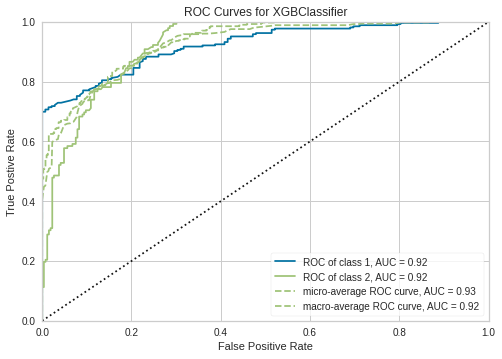

In [16]:

# AUC-ROC plot
classification.plot_model(classification_xgb, plot = 'auc')



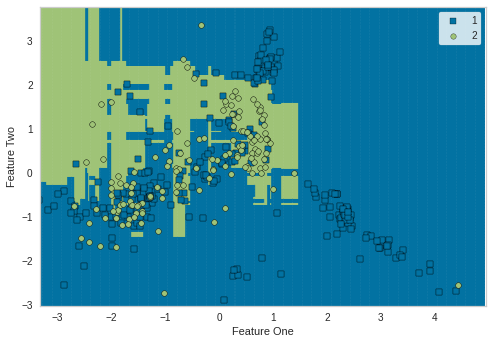

In [17]:
# Decision Boundary
classification.plot_model(classification_xgb, plot = 'boundary')

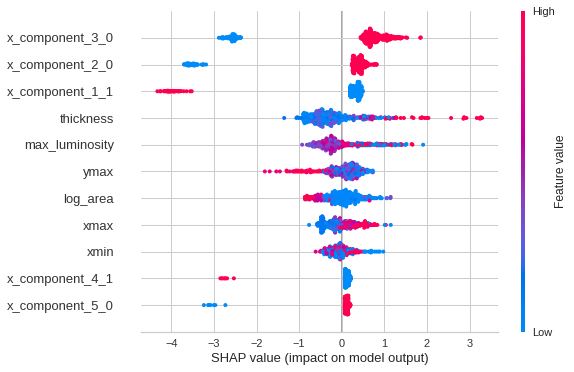

In [20]:
# Interpretting of cat boost algorithm
# Decision Boundary
classification.interpret_model(classification_cat, plot = 'summary')

In [23]:
%%time
# evaluate model-- It will create a video , but here it has not worked properly
classification.evaluate_model(classification_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

CPU times: user 54.4 ms, sys: 2.93 ms, total: 57.4 ms
Wall time: 70.2 ms


In [22]:

# make predictions
predictions = classification.predict_model(classification_xgb, data=test)
# view the predictions
predictions

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,Label,Score
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0,1,0.0149
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0,2,0.6687
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0,1,0.0258
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0,1,0.0079
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0,1,0.3254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,153,55,1479,1494,1249666,1249598,198,198.846687,0,0,0,0,0,2,0.5062
579,0,1,147,43,103,161,157594,156565,2703,2703.985608,0,0,1,0,0,1,0.0091
580,0,1,141,44,1,388,509942,511791,21195,21195.427257,0,0,1,0,0,1,0.0143
581,0,1,212,150,414,451,137693,138014,9169,9169.287230,1,0,0,0,0,1,0.1046


Reference : 

https://www.analyticsvidhya.com/blog/2020/05/pycaret-machine-learning-model-seconds/?utm_source=feed&utm_medium=feed-articles&utm_campaign=feed